# Classification of Obesity using Decision Tree and Scikit Learn

### Dataset Overview

In this Dataset we have to estimate the obesity level of person from Mexico,Peru,Colombia the basis of attributes given in dataset,dataset contains 2111 rows and 17 attributes,

Brief Discription about attributes:-
    <ul>
        <li> __Gender:__ categorical variable that shows the biological sex of the individual (male or female)</li>
        <li> __Age:__ numerical variable that shows the individual’s age in years.</li>
        <li> __Height:__ numerical variable that shows the individual's height in meters.</li>
        <li> __Weight:__ numerical variable that shows the individual's weight in kilograms.</li>
        <li> __Family history of overweight:__ categorical variable that shows if the individual has a family member who is overweight or obese</li>
        <li> __Frequently consumed high-calorie food (FAVC):__ categorical variable that shows if the individual often eats high-calorie food</li>
        <li> __Frequency of consumption of vegetables (FCVC):__ ordinal variable that shows how often the individual eats vegetable</li>
        <li> __Number of main meals (NCP):__ ordinal variable that shows how many main meals the individual has daily </li>
        <li> __Consumption of food between meals (CAEC):__ ordinal variable that shows how often the individual eats food between meals </li>
        <li> __SMOKE:__ categorical variable that shows whether the individual smokes or not</li>
        <li> __Consumption of water daily (CH2O):__ ordinal variable that shows how much water the individual drinks daily </li>
        <li> __Monitor calorie intake (SCC):__ categorical variable that shows if the individual keeps track of their caloric intake</li>
        <li> __Frequency of physical activity (FAF):__ ordinal variable that shows how often the individual does physical activity </li>
        <li> __Time using electronic devices (TUE):__ ordinal variable that shows how long the individual uses electronic devices</li>
        <li> __Consumption of alcohol (CALC):__ ordinal variable that shows how often the individual drinks alcohol</li>        <li> __Type of transportation used (MTRANS):__ categorical variable that shows what kind of transportation the individual uses</li> 
        <li> __Level of obesity according to body mass index (NObesity):__ ordinal variable that shows the obesity level of the individual according to their BMI</li> 
     </ul>

## Importing Library

In [166]:
# Default
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly 
import plotly.graph_objects as go
import seaborn as sns

# Data prepocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.tree import DecisionTreeClassifier

#results
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

#Hyperparamater Tuning
from sklearn.model_selection import GridSearchCV

#warining
import warnings
warnings.filterwarnings("ignore")


### Importing the DataSet

In [167]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [168]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [169]:
print("Numbers of observations {} ".format(df.shape[0]))
print("Numbers of Atrributes {} ".format(df.shape[1]))

Numbers of observations 2111 
Numbers of Atrributes 17 


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [171]:
df.describe(include = "all")

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


In [172]:
df.rename(columns = {"NObeyesdad": "NObesity"} , inplace = True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Null values Check

In [174]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64

## Types of Variables 

### Numerical Variables

In [175]:
numerical_var = [var for var in df.columns if df[var].dtype != "O"]
numerical_var

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Categorical Variables

In [176]:
categorical_var = [var for var in df.columns if var not in numerical_var ]
categorical_var

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObesity']

### Discrete Variables

In [177]:
discrete_var= [var for var in numerical_var if len(df[var].unique()) < 40 ]

In [178]:
discrete_var

[]


### Continuous Variable

In [179]:
continuous_var = numerical_var 

In [180]:
continuous_var

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Summary 

1. __Numerical Variables__ are 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE' and all are __Continuous Variables__ too
2. __Categorical variables__ are 'Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObesity'
3. __Target variable__ is NObesity
4. __There no Null Values in Table__

## EDA(Exploratory DATA Analysis)

### Univarient Analysis

##### 1.Contunous variables

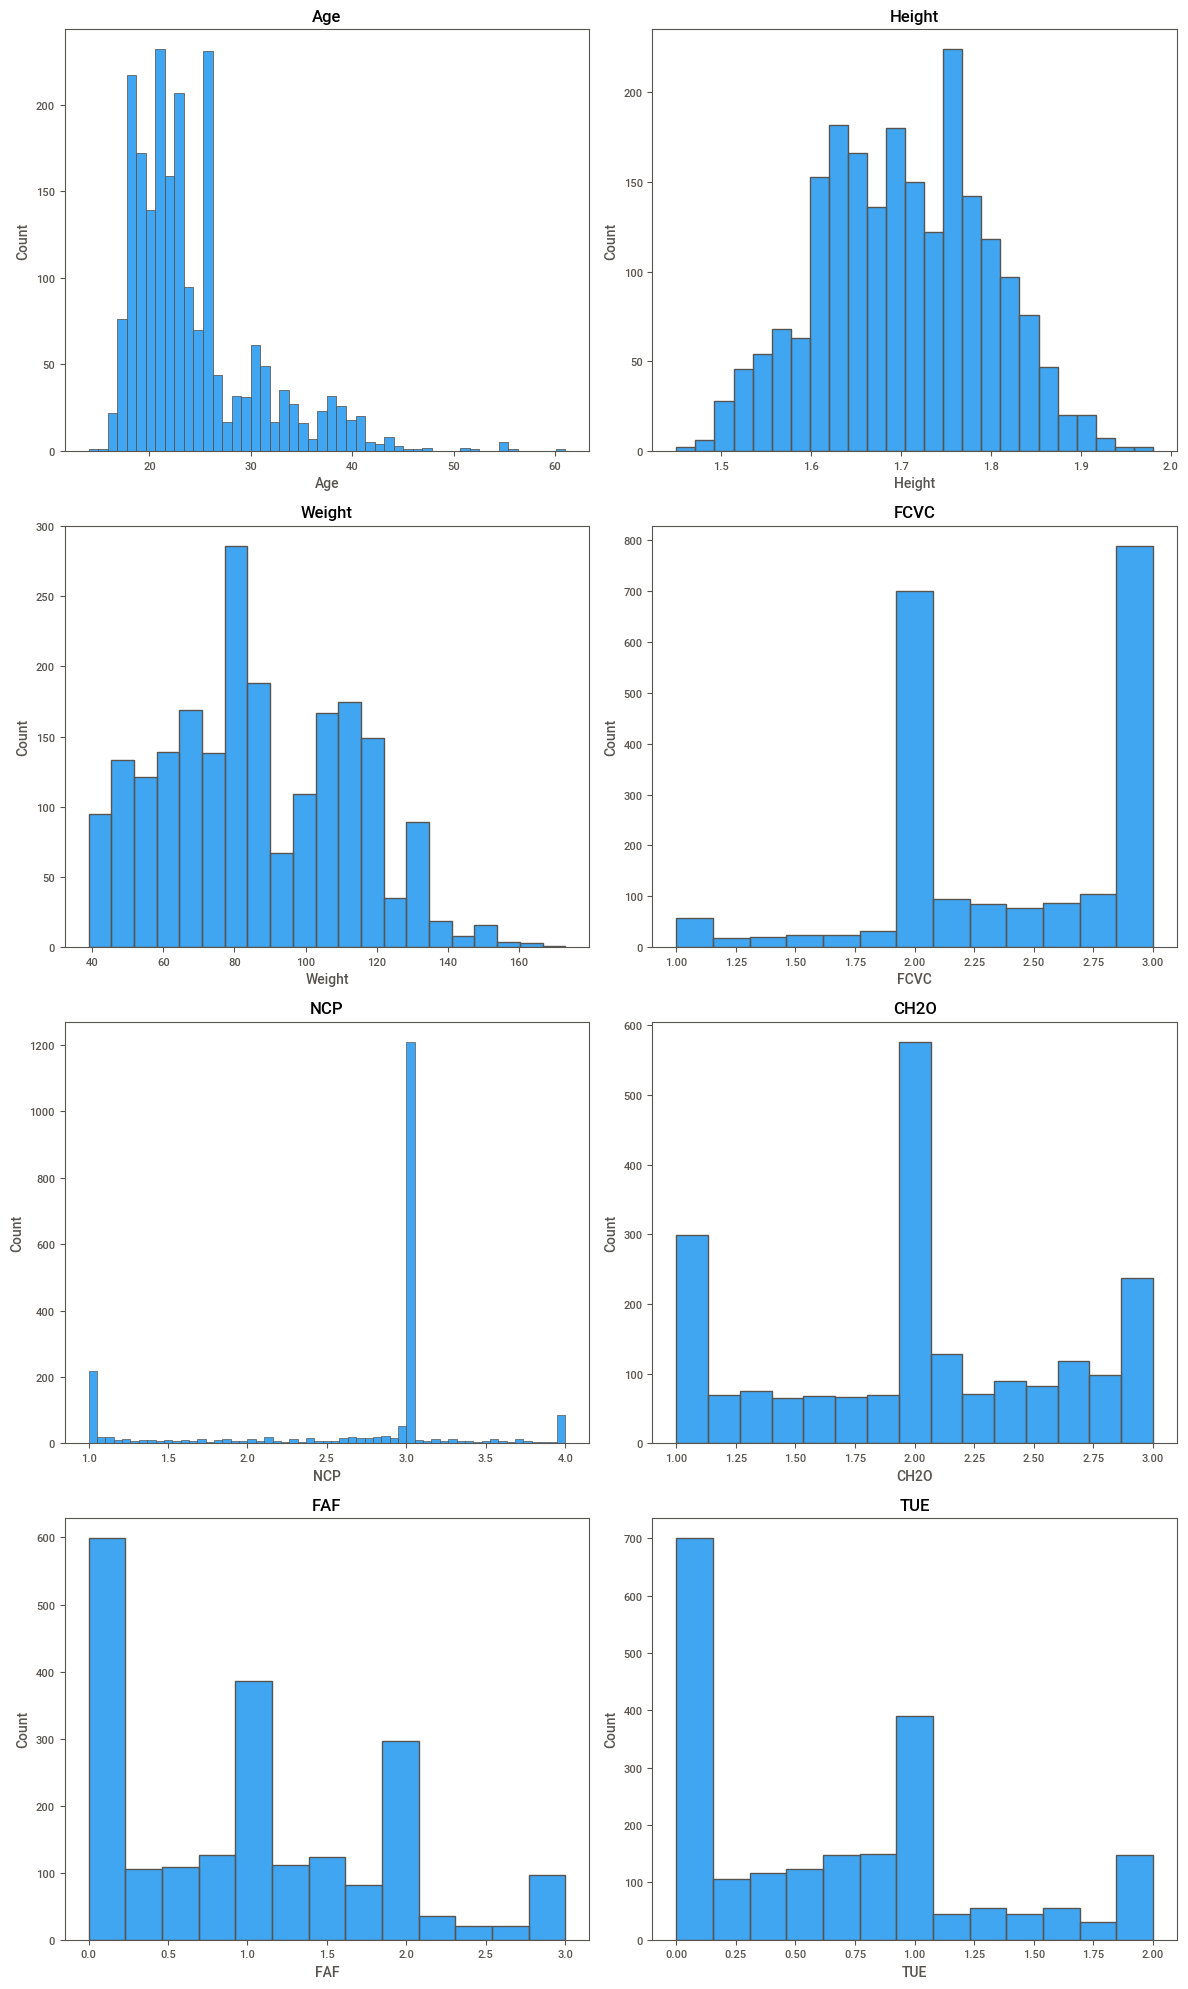

In [181]:
plt.figure(figsize = (12,20))
counter = 1
for var in numerical_var:
    if counter < 10 :
        plt.subplot(4,2,counter)
        sns.histplot(x = var,data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

1. we can here see that maximum number of people having age between 18 to 26
2. we can see that maximum number of people having height b/w 160cm to 180cm
3. we can see that maximum number of people having weight b/w 40 - 120  kg
4. we can see maximum number of people can eat 2 to3 time vagitable daily
5. we can also see maximum number of people take 1,3 times meal in a day
6. we can see that maximum numer of people drink 1,2,3 L water in a day
7. we can see that maximum number of people donot involve in physical activity and rest of them can do 1 - 2 times exercise in a day 

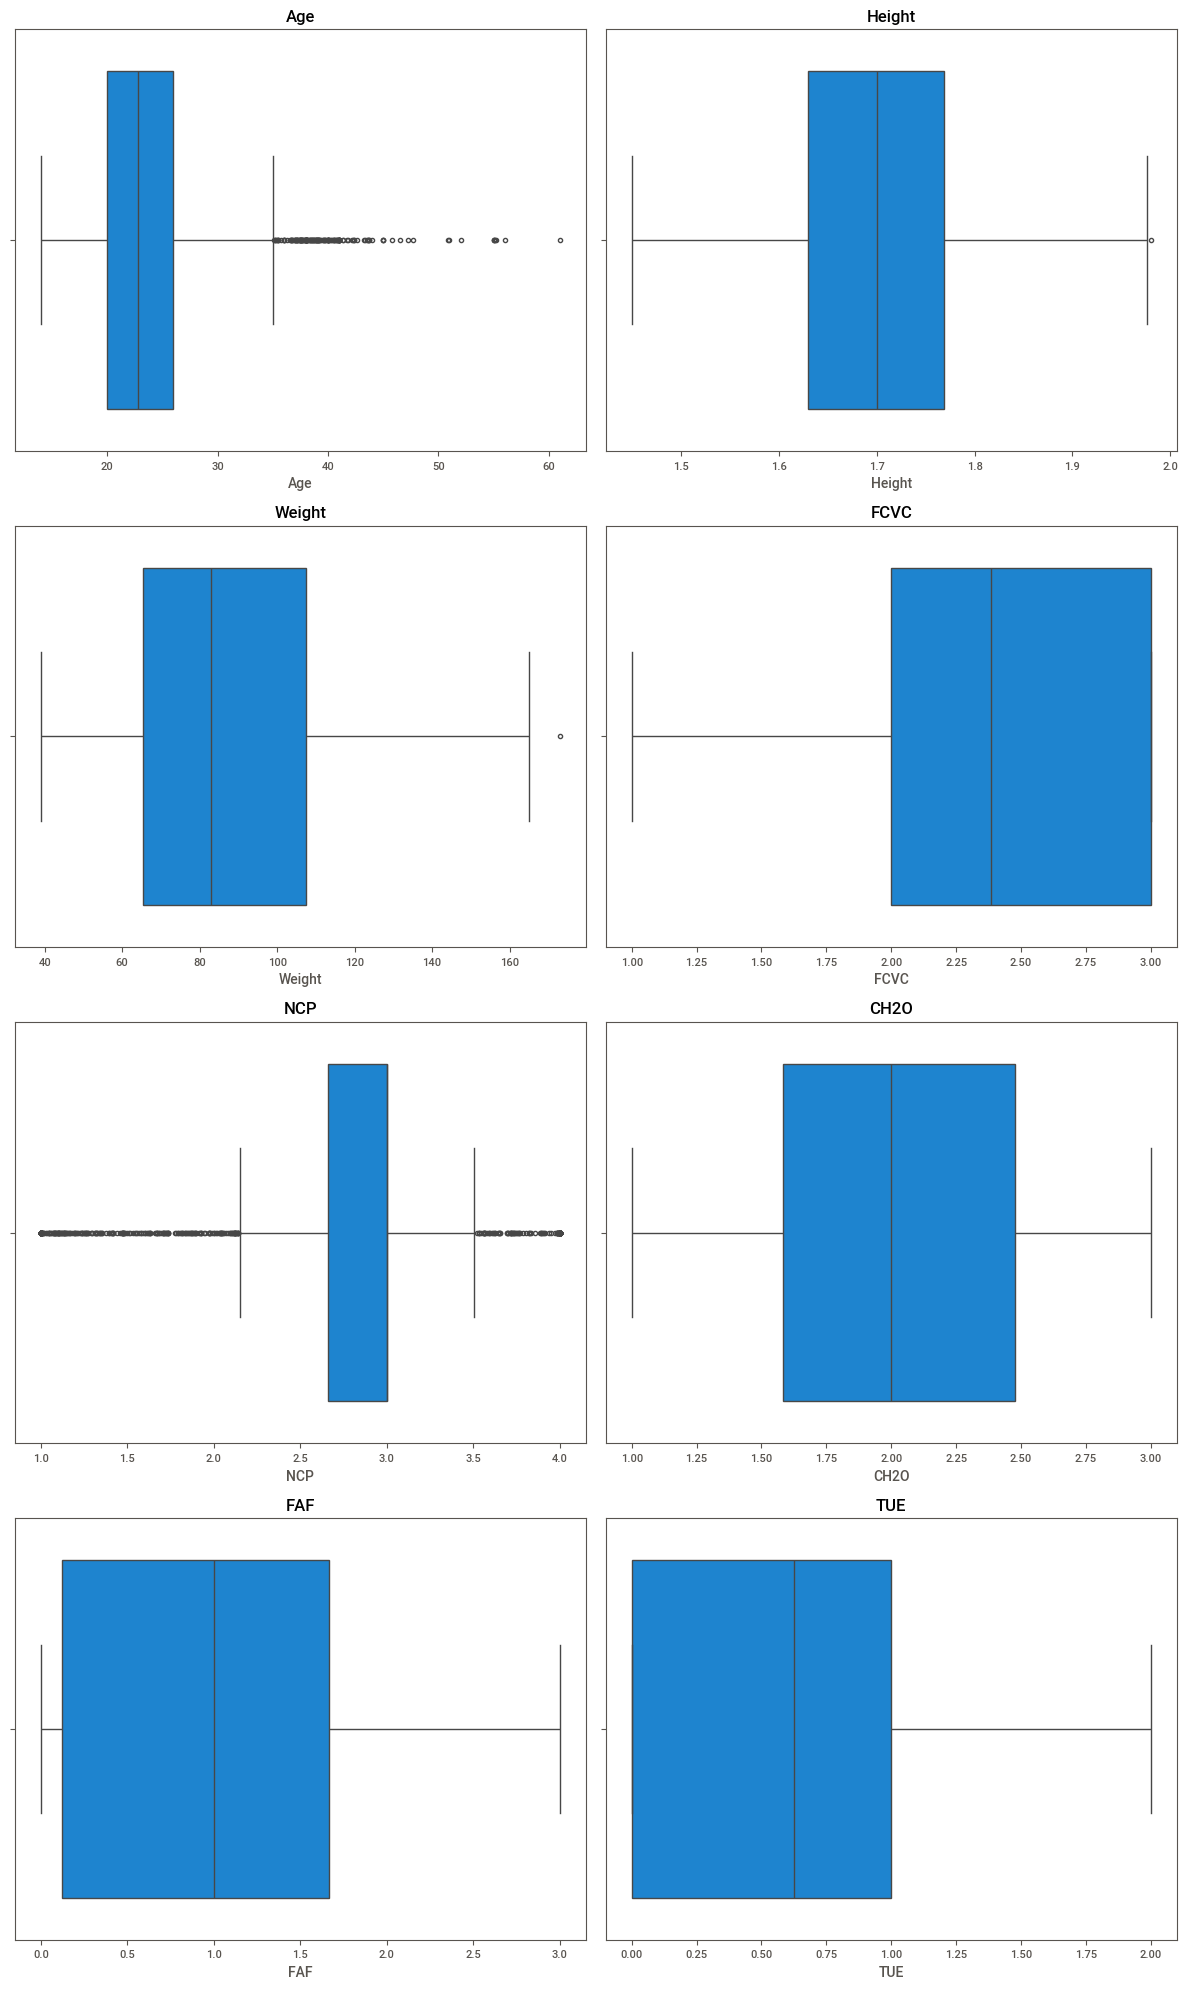

In [182]:
plt.figure(figsize = (12,20))
counter = 1
for var in numerical_var:
    if counter < 10 :
        plt.subplot(4,2,counter)
        sns.boxplot(x = var,data = df)
        plt.title(var)
    counter += 1
plt.tight_layout()

In [183]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


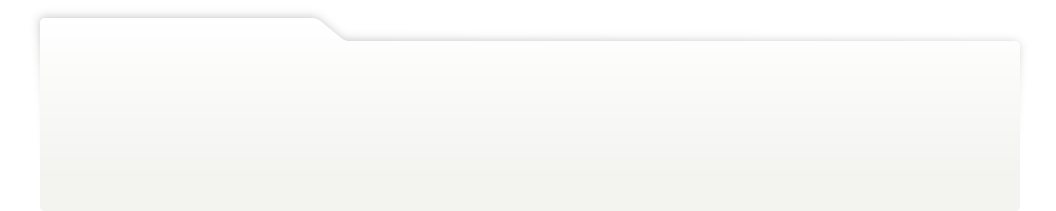
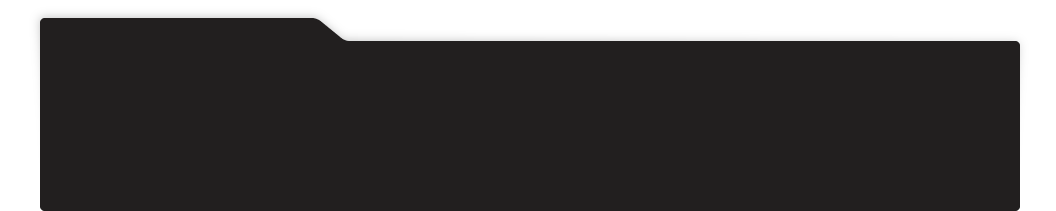
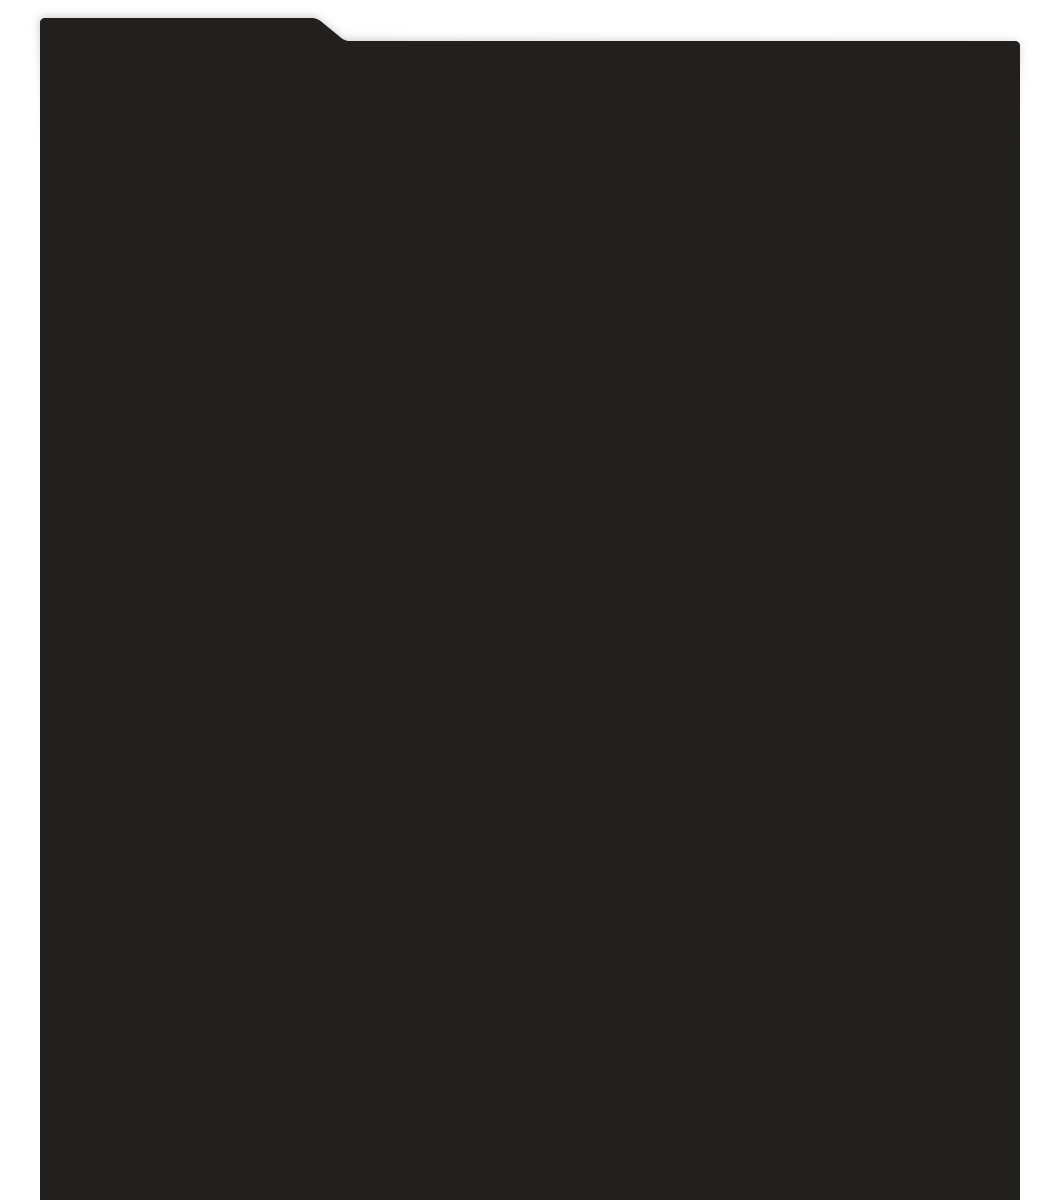
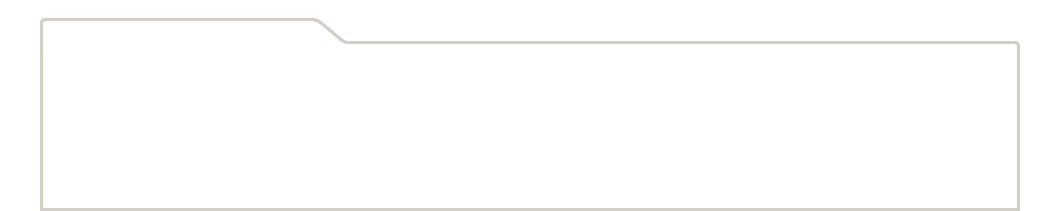
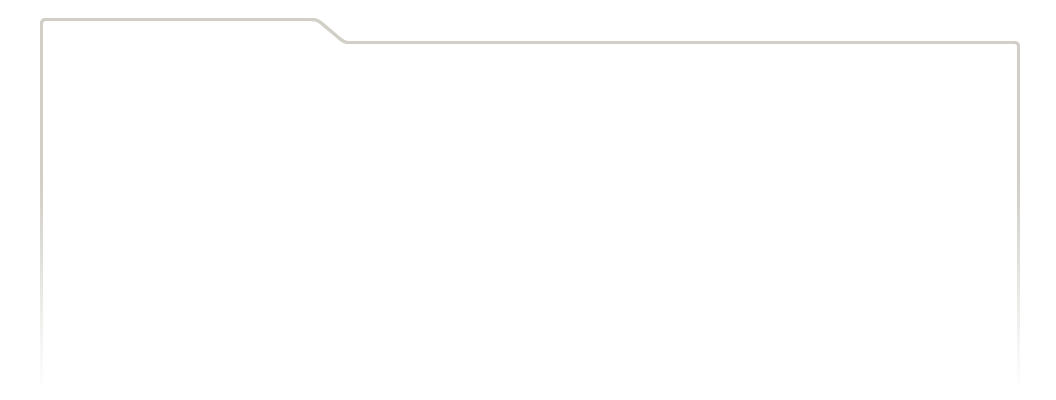
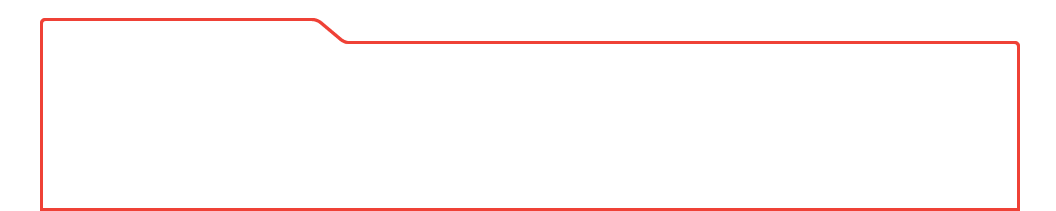
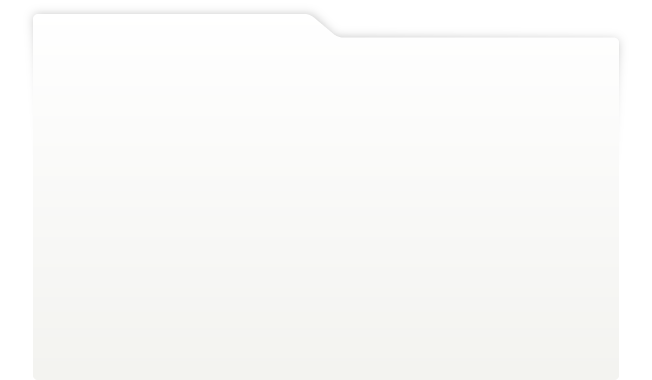
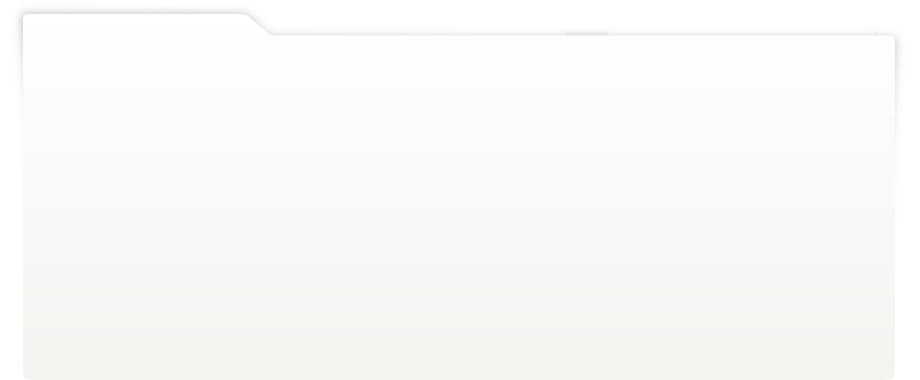
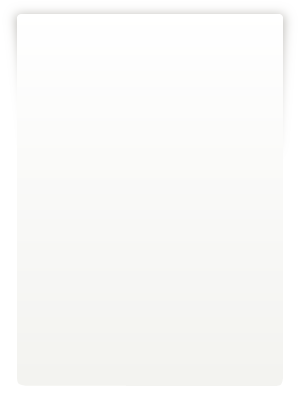
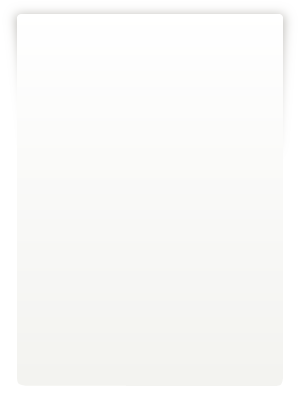
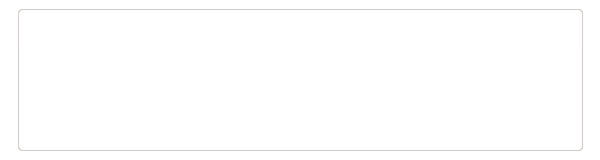
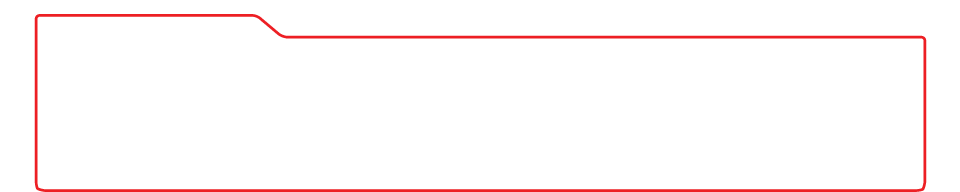
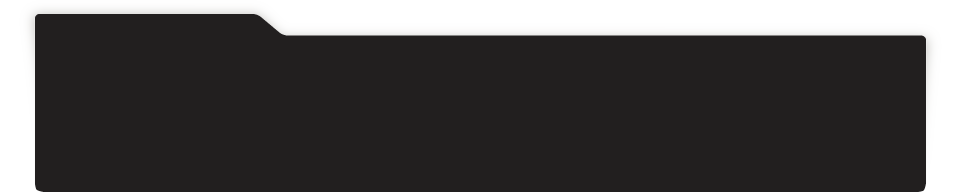
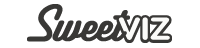
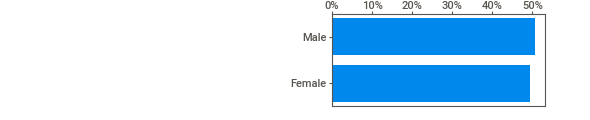
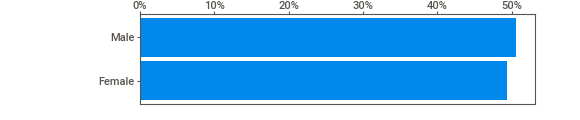
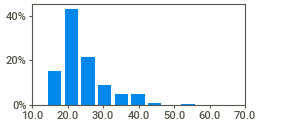
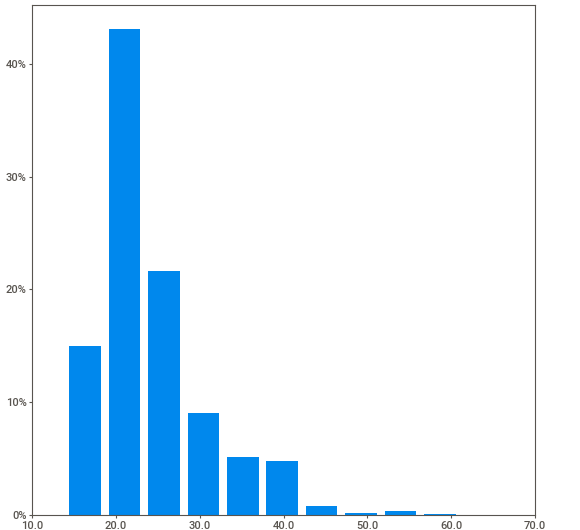
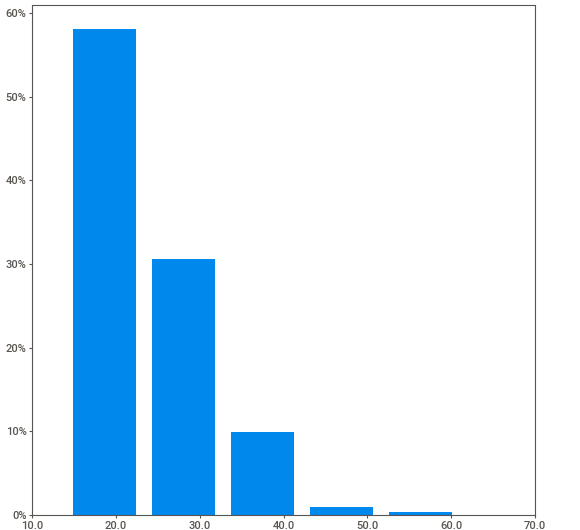
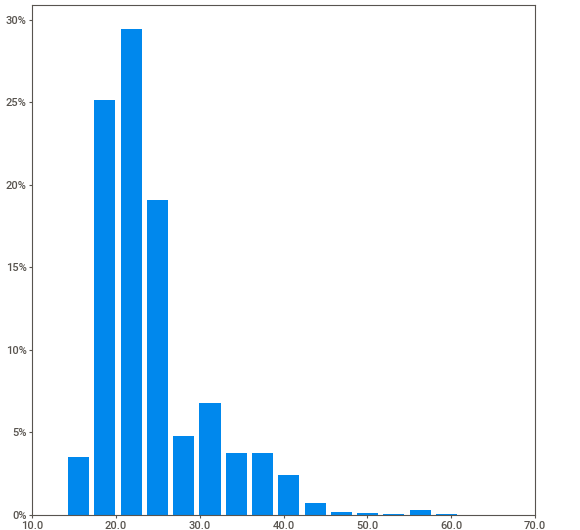
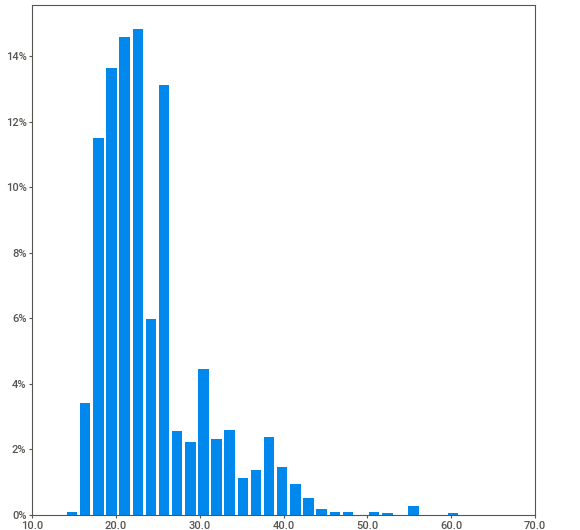
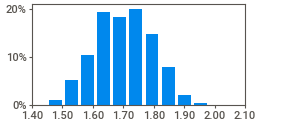
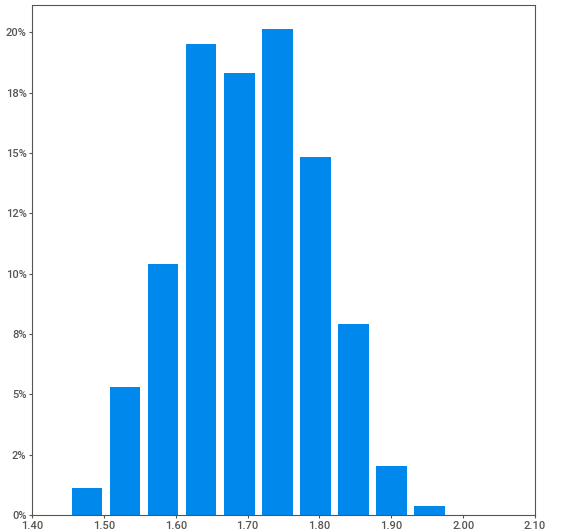
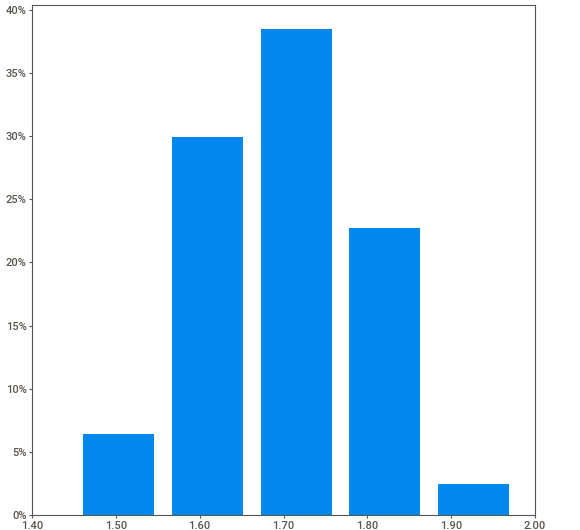
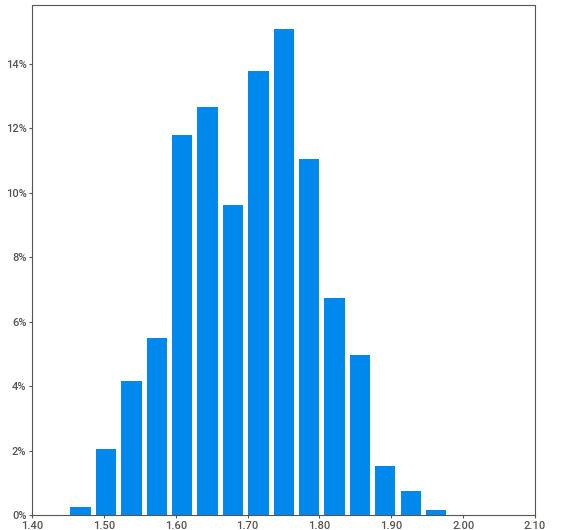
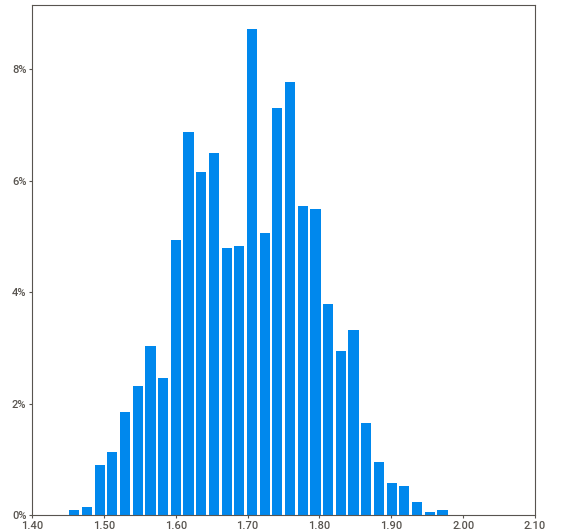
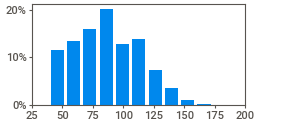
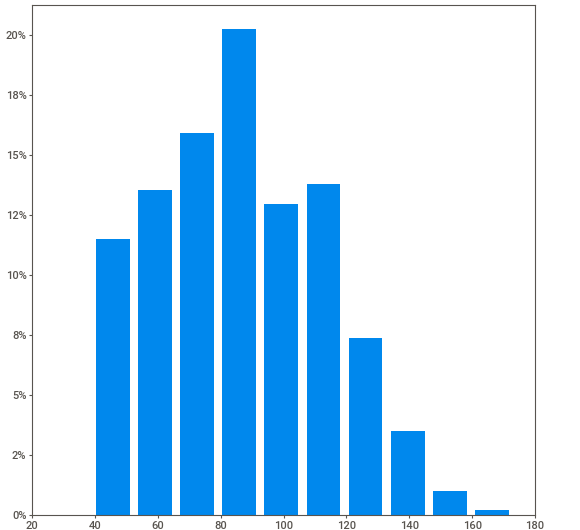
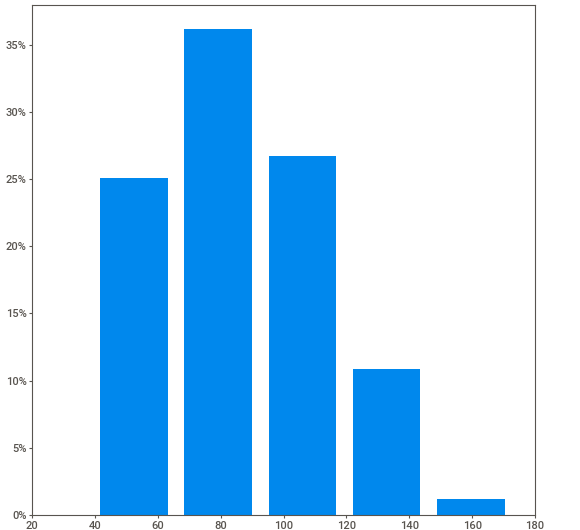
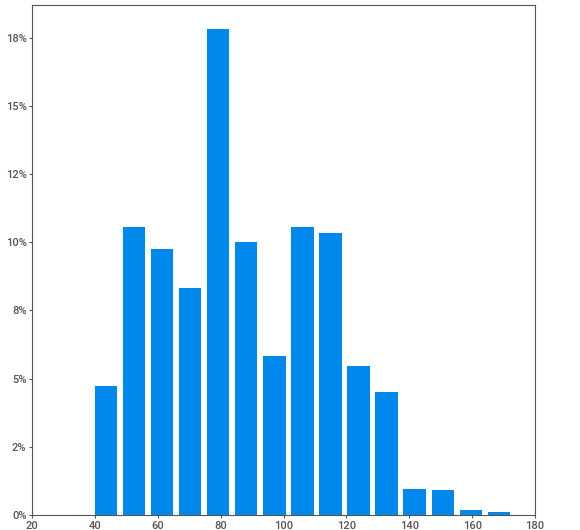
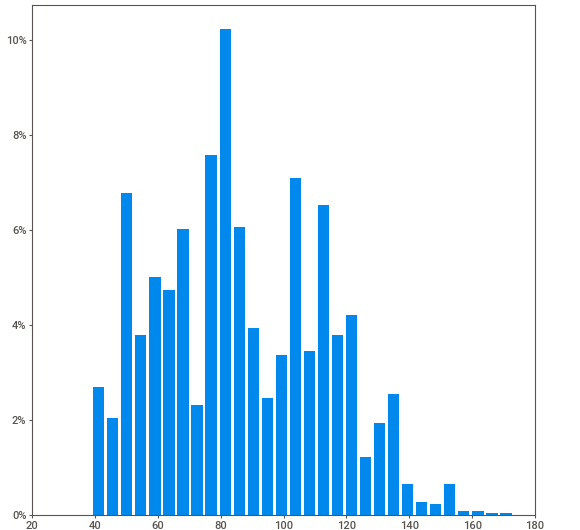
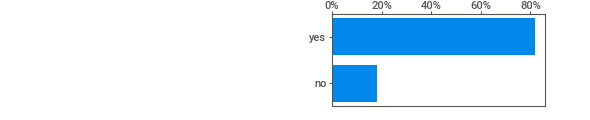
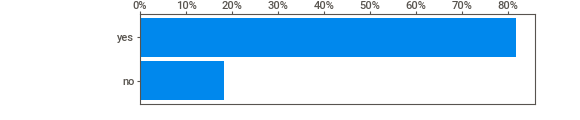
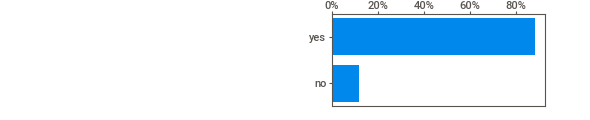
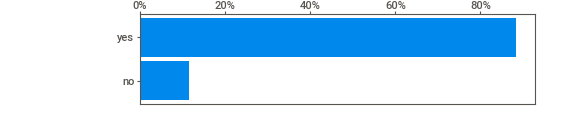
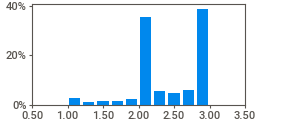
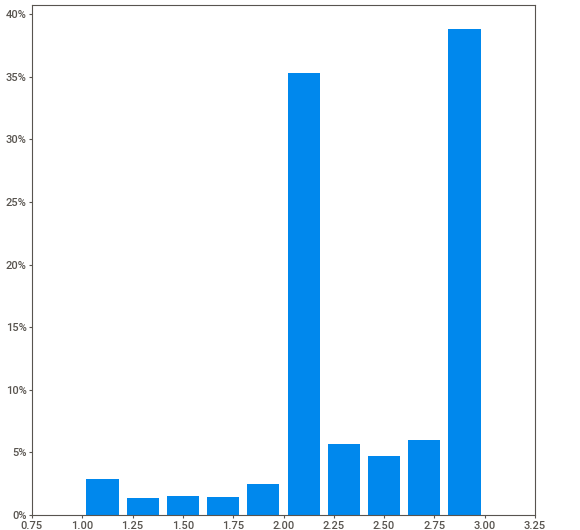
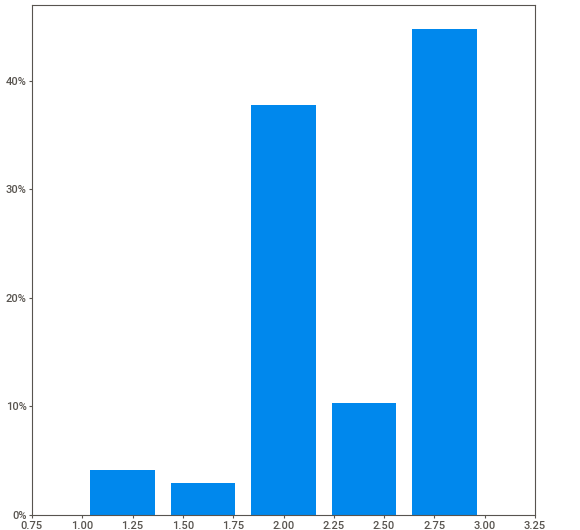
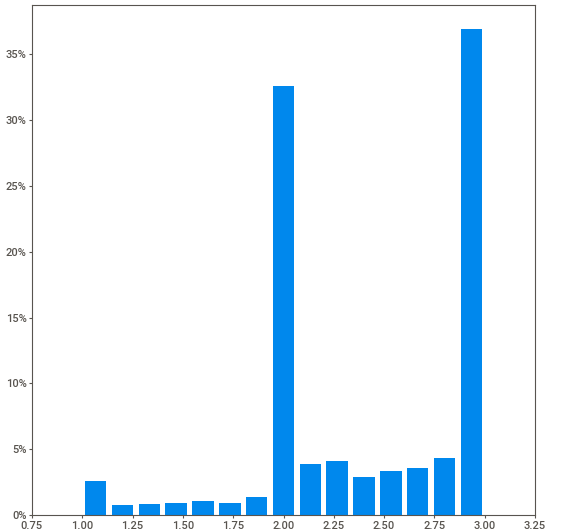
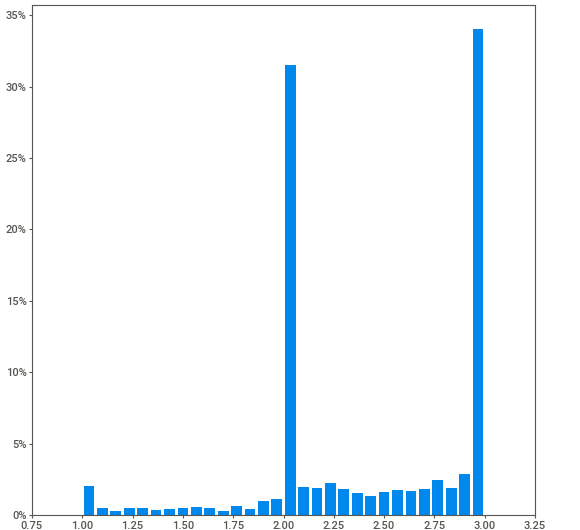
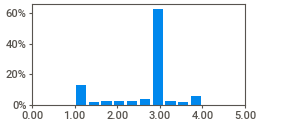
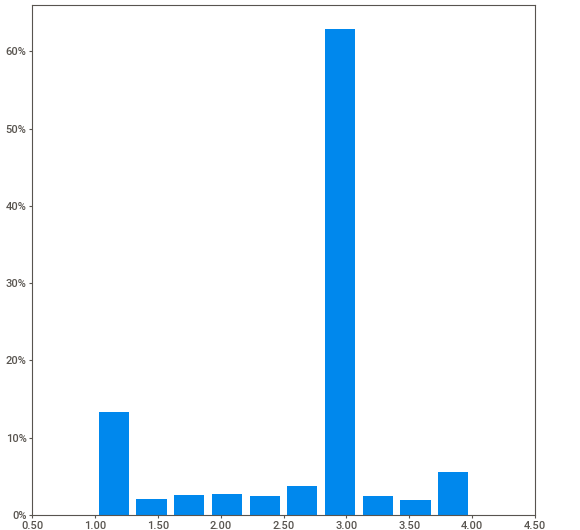
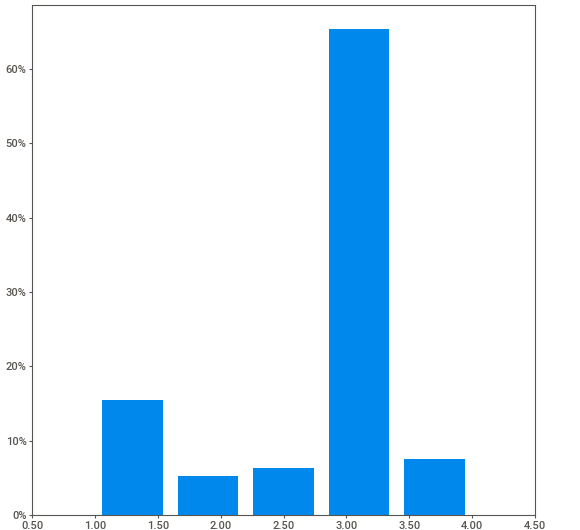
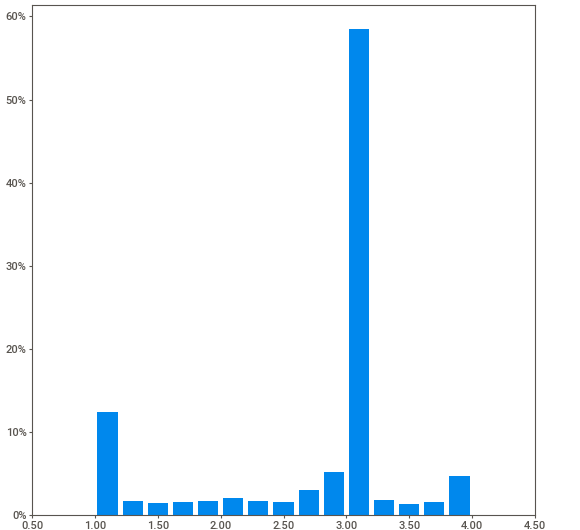
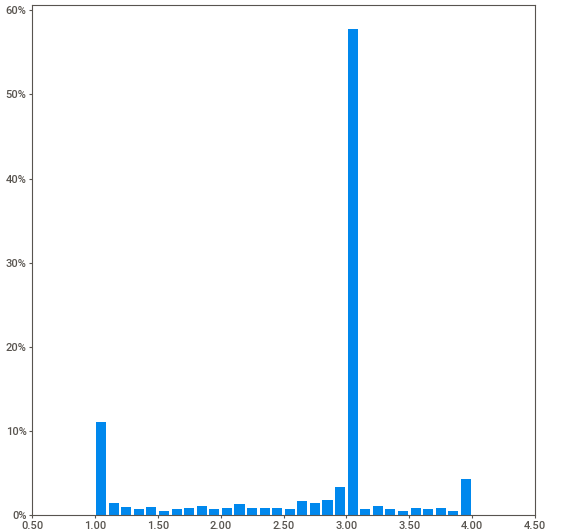
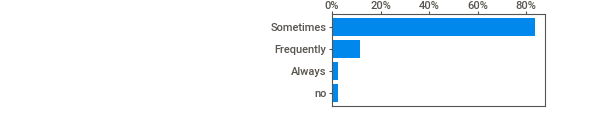
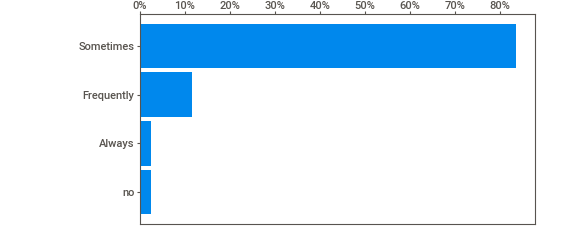
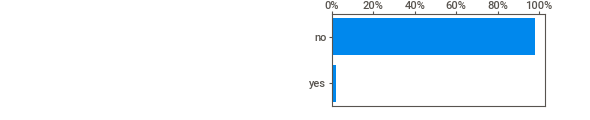
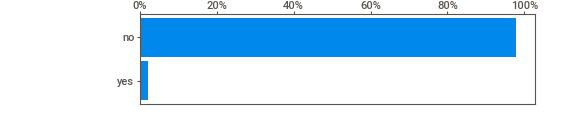
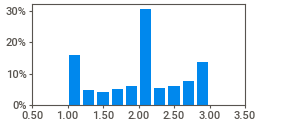
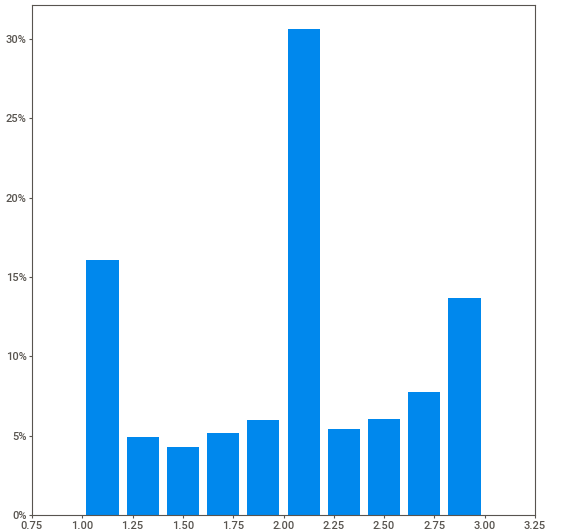
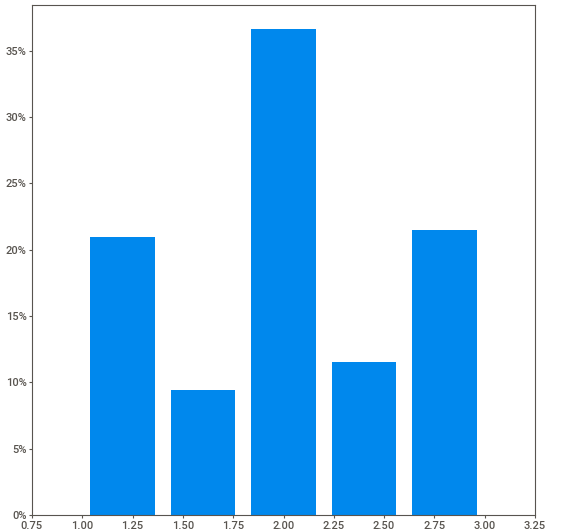
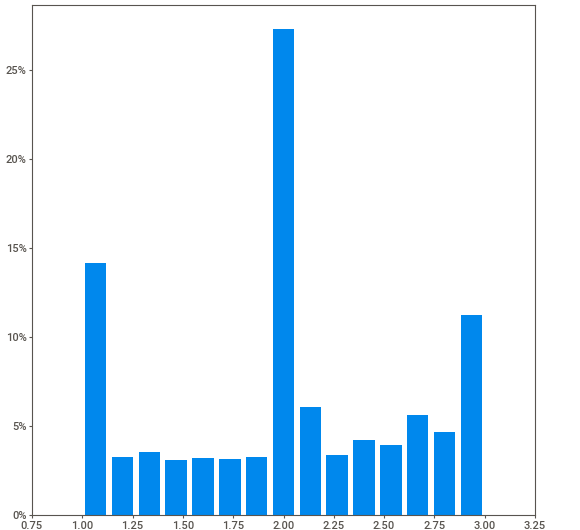
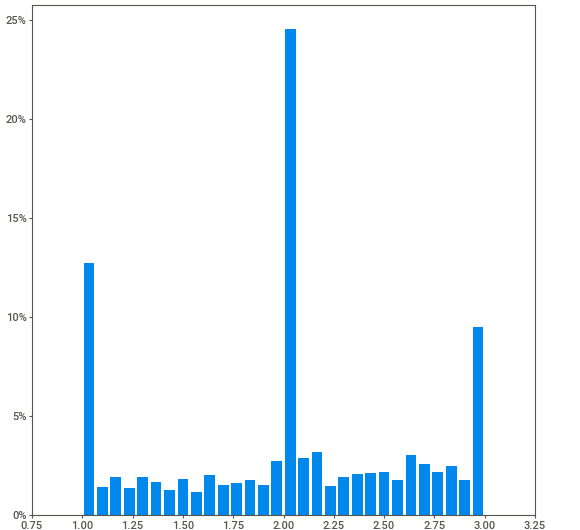
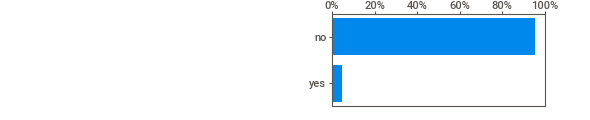
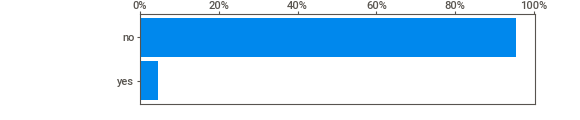
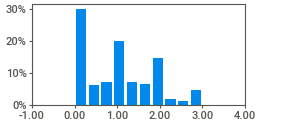
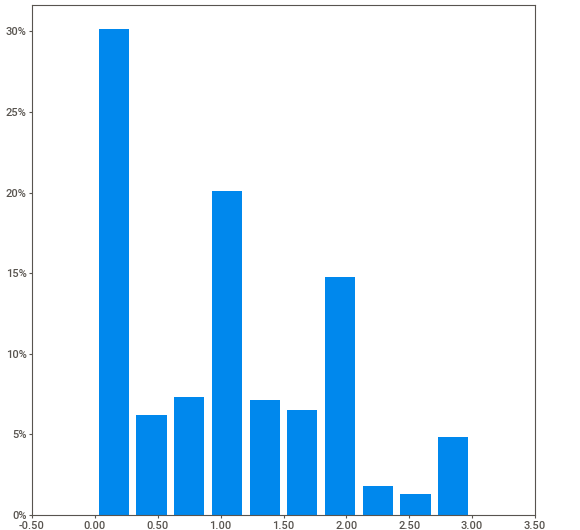
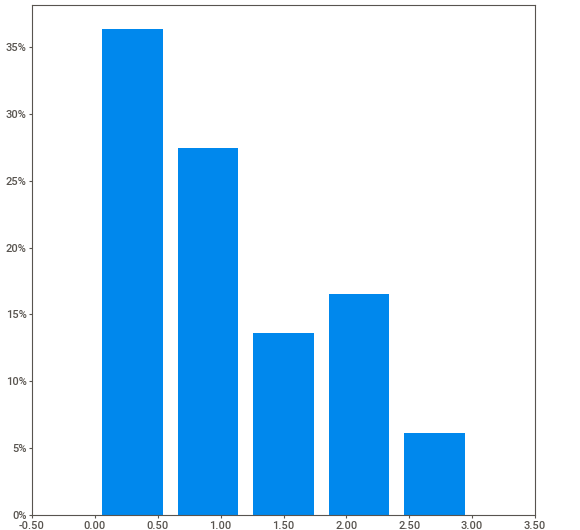
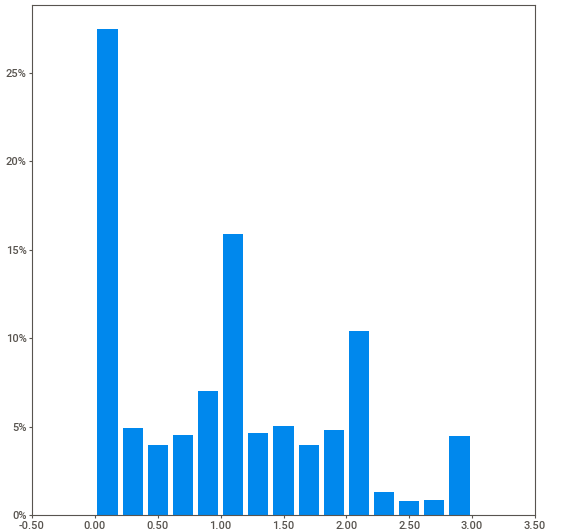
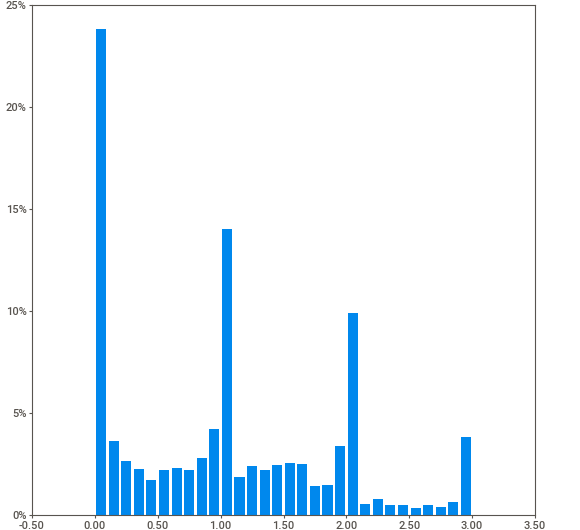
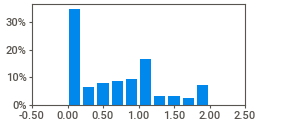
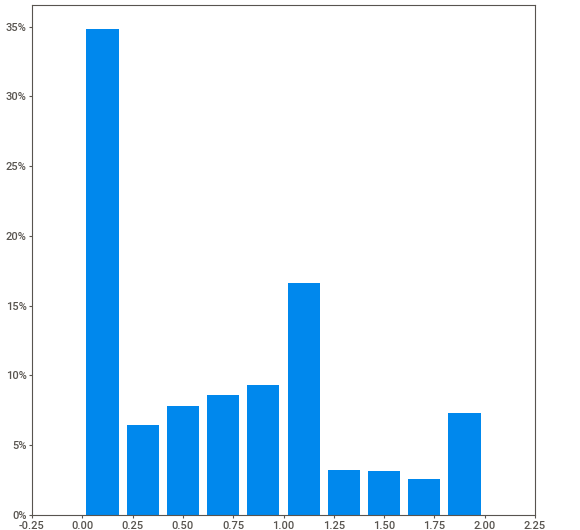
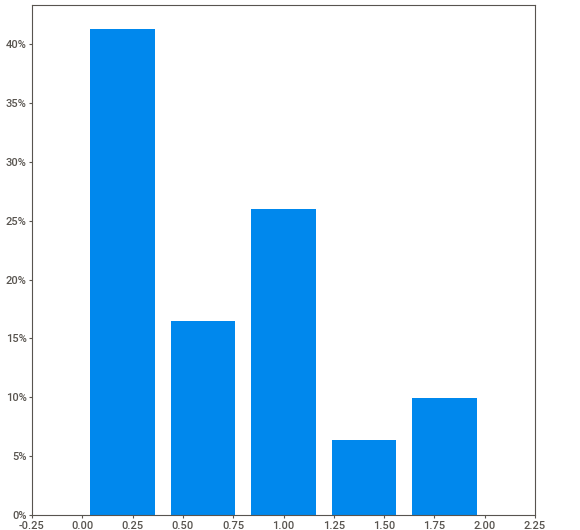
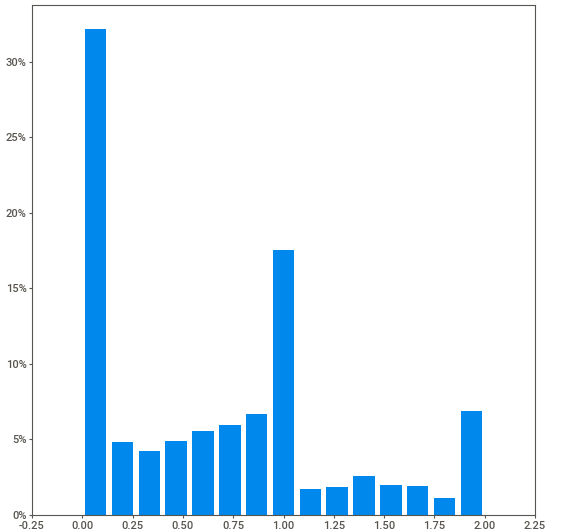
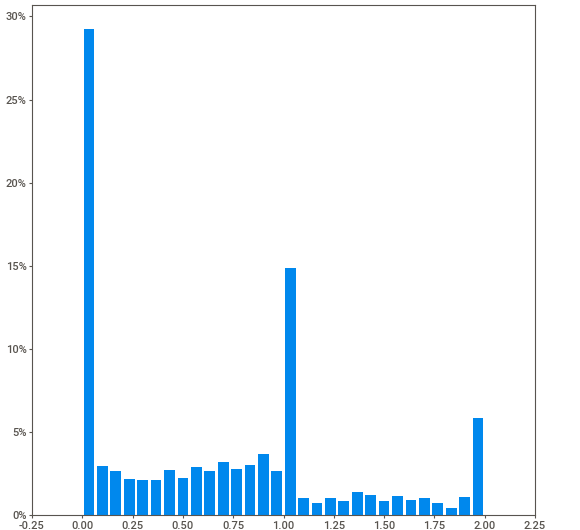
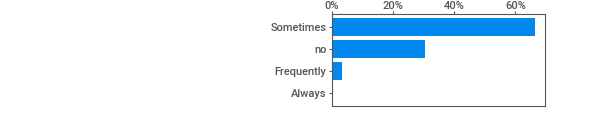
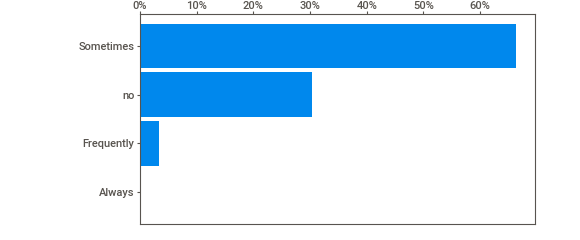
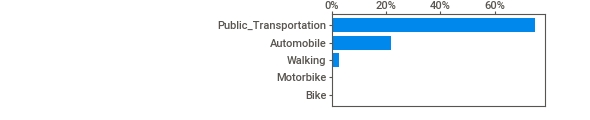
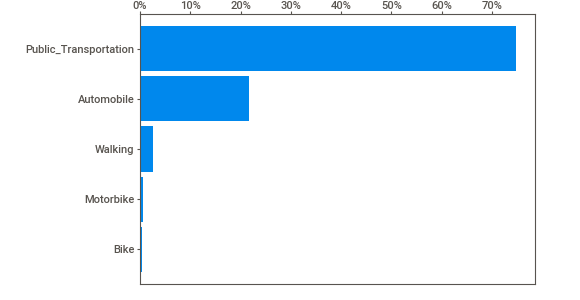
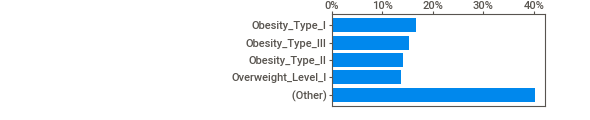
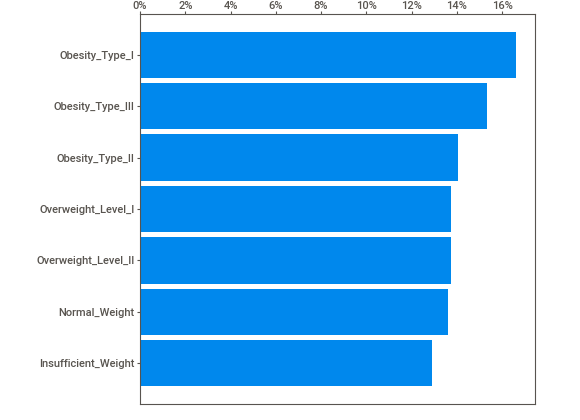
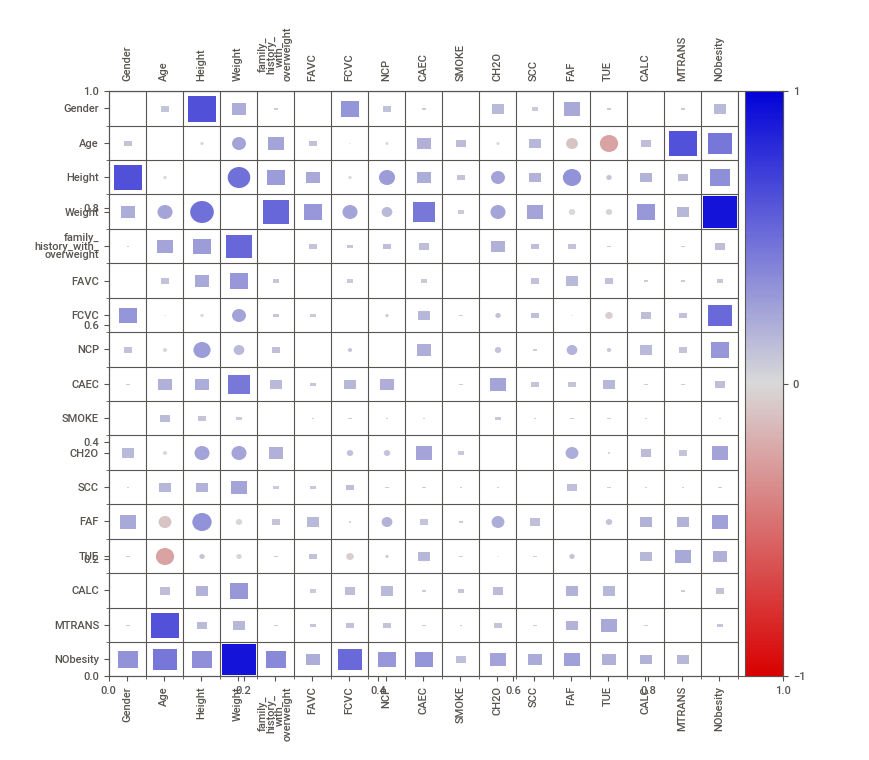
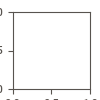

In [184]:
result=sv.analyze(df) 
result.show_notebook() 

#### Target Variable

In [185]:
var = df.NObesity.value_counts().index
value = df.NObesity.value_counts().values

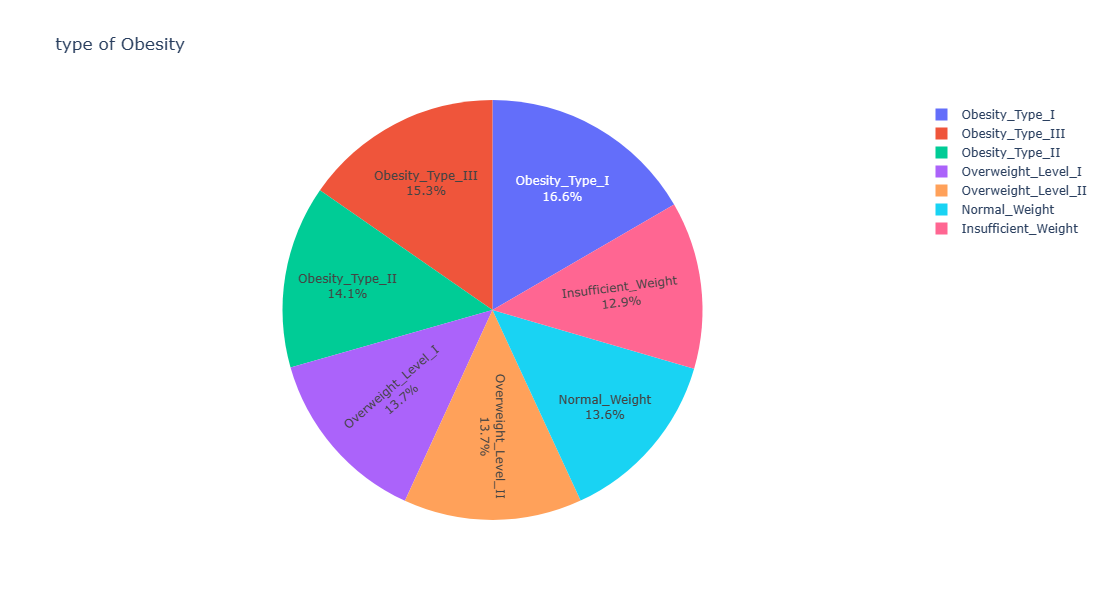

In [186]:
fig = px.pie(data_frame = df, names = var, values = value, title = "type of Obesity", width =  800, height = 600)
fig.update_traces(textposition = 'inside', textinfo='label+percent')
fig.show()

<Axes: xlabel='NObesity', ylabel='count'>

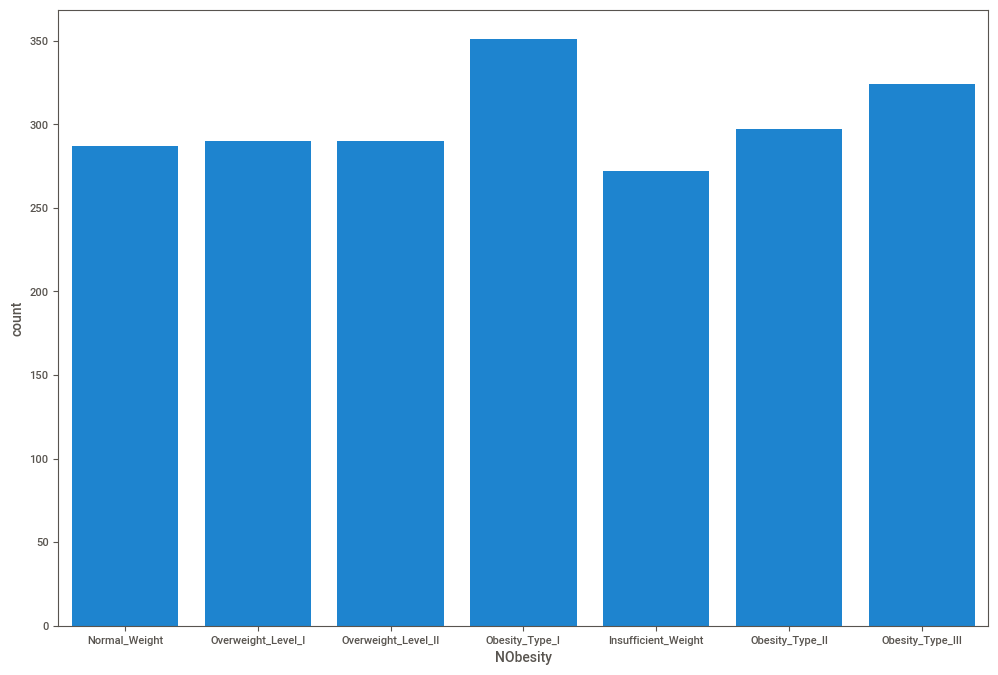

In [187]:

plt.figure(figsize = (12,8))
sns.countplot(x ="NObesity", data = df)

we can see that our Target varible is divided into 7 different categories __'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II','Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight','Insufficient_Weight'__, they are equally distributed __(12% - 16%)__

## Bivarient Analysis

### 1. Gender vs NObesity

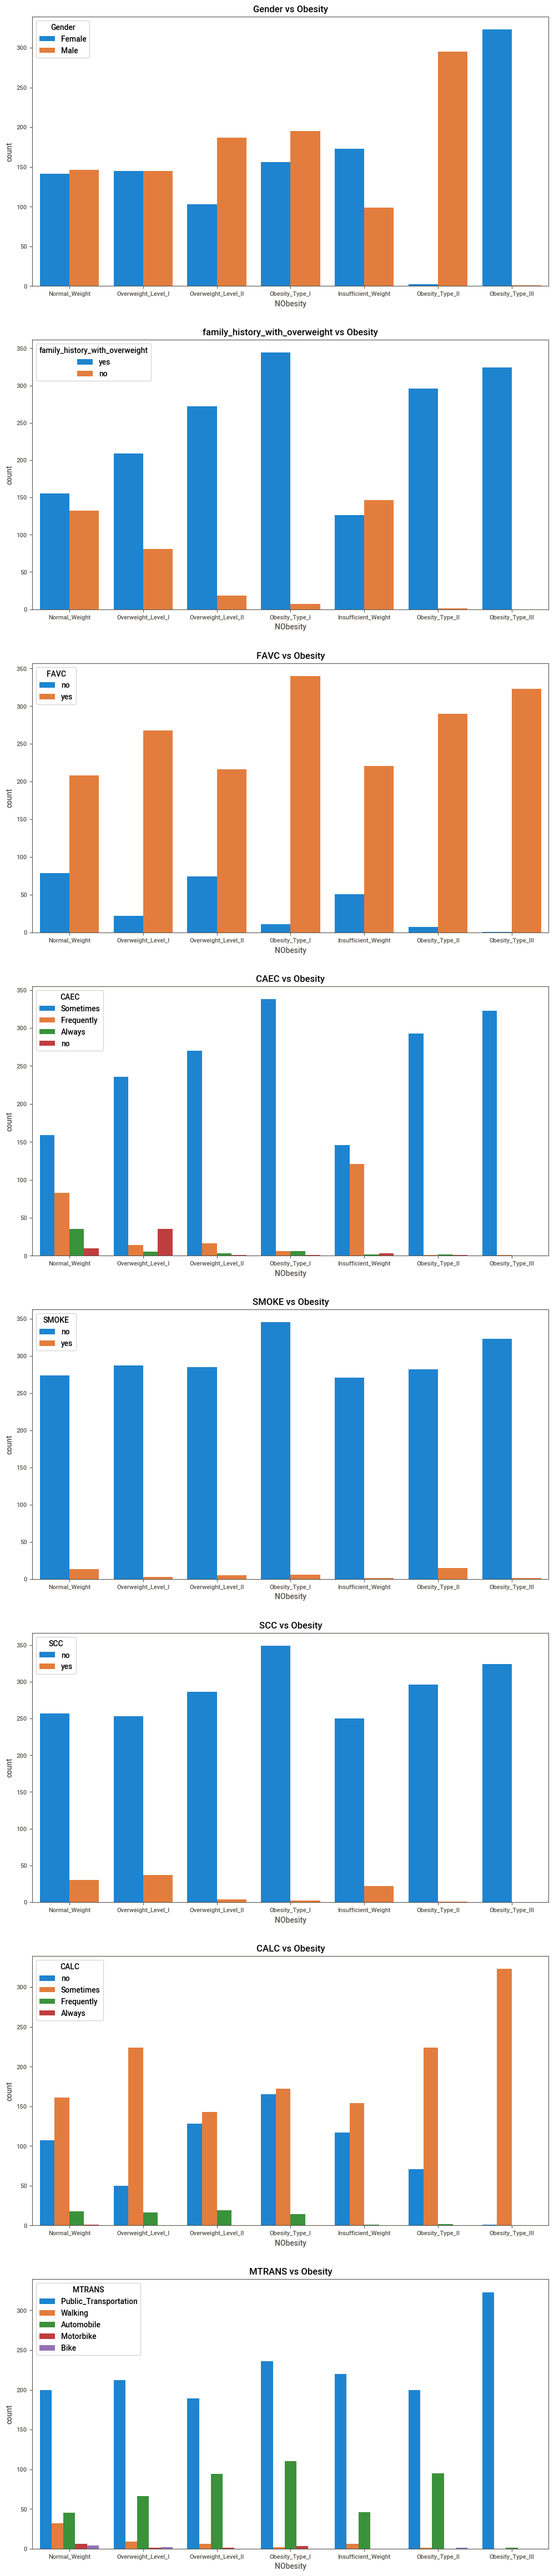

In [188]:
plt.figure(figsize = (12,150))
counter =1
for var in categorical_var:
    if counter < 9:
        plt.subplot(20,1,counter)
        plt.title(f"{var} vs Obesity")
        sns.countplot(x = "NObesity" , hue = var, data = df)
    counter +=1
plt.show()

### Summary

1. We can see that Obesity_Type_ll,Obesity_Type_lll has imbalance data in Obesity_Type_ll the are more number of males and in Obesity_Type_lll female, and or other NObesity categories data is almost balanced
2.  We can see that Family history can cause Obesity Problem
3. we can see those who dosent take their calories ,got Obesity problem
4. Smoking dosent dosent make any sense in obesity problem
5. we can see drinking Alchole can cause obesity_type_|| and ||  and overweight
6. we can see maximum people use public transport, no driving no calories burn

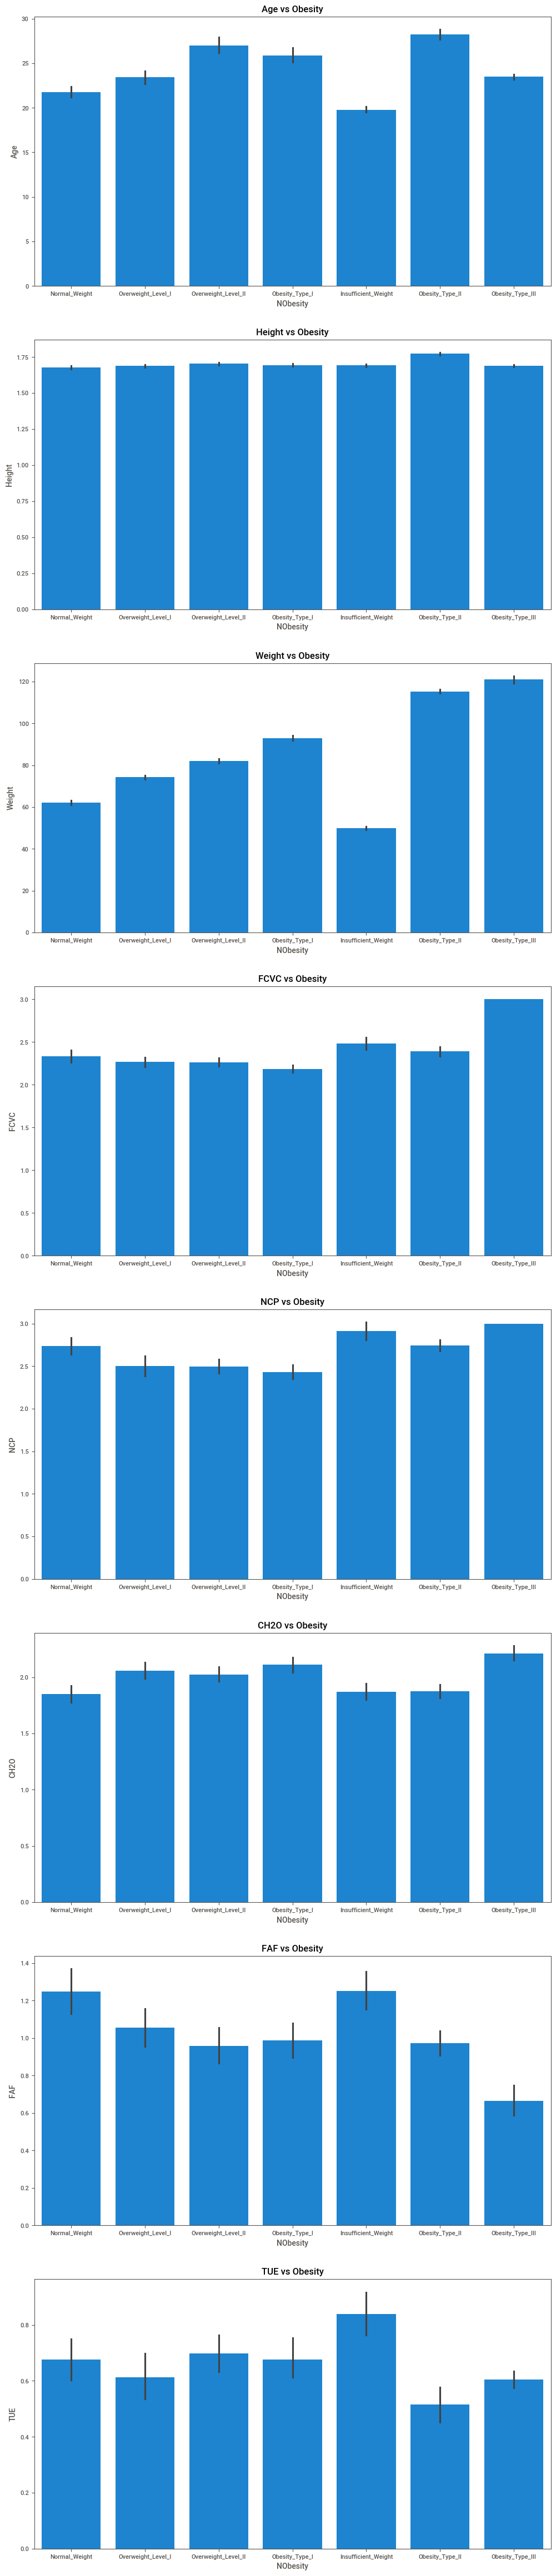

In [189]:
plt.figure(figsize = (12,150))
counter =1
for var in numerical_var:
    if counter < 9:
        plt.subplot(20,1,counter)
        plt.title(f"{var} vs Obesity")
        sns.barplot(x = "NObesity" , y = var, data = df)
    counter +=1
plt.show()

### summary

1. we can see the teenagers form 19 - 21 has insuffient_weight, as the age increases obesity level increases
2. we can see that as the weight increases obesity level increases
3. pleople having obesity type||| eats maximum times vegitables
4. Almost all obesity category people take 2 - 3 meals
5. Almost all obesity category people drink 2-3 L water
6. Obesity||| peole involve few times in physical Activity
7. people with insufficent weight have maximum usage of electronic devices

## Correlation Tabel

<Axes: >

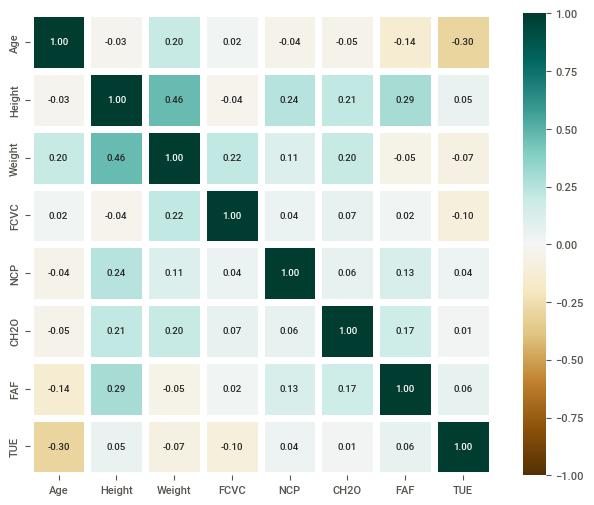

In [190]:
plt.figure(figsize=(8, 6))
df1 = df.loc[ : , numerical_var] 
sns.heatmap(df1.corr(),annot=True,square=True,center=0,vmin=-1,vmax=1,cmap='BrBG',fmt= '.2f',linewidths=5,annot_kws={"size": 7})

There is not good correltion b/w any numerical vaiable

## Feature Engineering

In [191]:
categorical_var

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObesity']

In [192]:
df.Gender = df.Gender.map({"Male": 1 , "Female": 0})

In [193]:
df.Gender

0       0
1       0
2       1
3       1
4       1
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: Gender, Length: 2111, dtype: int64

In [194]:
df.family_history_with_overweight = df.family_history_with_overweight.map({"yes" : 1, "no": 0})

In [195]:
df.family_history_with_overweight 

0       1
1       1
2       1
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: family_history_with_overweight, Length: 2111, dtype: int64

In [196]:
df.FAVC = df.FAVC.map({"yes" : 1, "no": 0})

In [197]:
df.CAEC = df.CAEC.map({"Always" : 3,"Frequently": 2, "Sometimes": 1, "no": 0})

In [198]:
df.CAEC

0       1
1       1
2       1
3       1
4       1
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: CAEC, Length: 2111, dtype: int64

In [199]:
df.SMOKE.unique()

array(['no', 'yes'], dtype=object)

In [200]:
df.SMOKE = df.SMOKE.map({"yes" : 1, "no": 0})

In [201]:
df.SCC.unique()

array(['no', 'yes'], dtype=object)

In [202]:
df.SCC = df.SCC.map({"yes" : 1, "no": 0})

In [203]:
df.CALC.unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [204]:
df.CALC = df.CALC.map({"Always" : 3,"Frequently": 2, "Sometimes": 1, "no": 0})

In [205]:
df.MTRANS = df.MTRANS.map({'Public_Transportation': 4, 'Walking': 2 , 'Automobile': 3 , 'Motorbike': 1 ,
       'Bike': 0})

In [206]:
df.NObesity = df.NObesity.map({'Normal_Weight': 2, 'Overweight_Level_I': 4, 'Overweight_Level_II': 3,
       'Obesity_Type_I': 7, 'Insufficient_Weight': 1, 'Obesity_Type_II': 5,
       'Obesity_Type_III': 6})

In [207]:
df.MTRANS

0       4
1       4
2       4
3       2
4       4
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: MTRANS, Length: 2111, dtype: int64

## Model Creation

In [208]:
X = df.drop(columns = "NObesity",  axis = 1)

In [209]:
y = df["NObesity"]

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [211]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
412,1,33.000000,1.850000,85.000000,0,1,2.000000,3.000000,2,0,2.000000,0,1.000000,0.000000,1,3
651,0,21.529439,1.592379,44.009450,0,0,3.000000,1.612747,2,0,2.566629,0,1.190465,0.000000,0,4
1460,1,23.000000,1.742500,105.028665,1,1,2.393837,3.000000,1,0,2.014990,0,0.978815,0.413220,1,4
1419,1,31.783524,1.672959,90.000000,1,1,2.949242,1.782109,1,0,2.210997,0,1.992719,0.000000,1,3
1433,0,22.307413,1.605495,82.528575,1,1,2.049112,2.622055,1,0,2.280555,0,2.052896,0.896185,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1,19.671876,1.699474,78.000000,1,0,1.925064,2.358298,1,0,2.774043,0,0.000000,0.133566,0,4
1731,1,30.554956,1.779136,120.600940,1,1,2.671238,3.000000,1,0,2.145368,0,0.882709,0.593917,1,3
763,1,21.000000,1.620000,70.000000,0,1,2.000000,1.000000,0,0,3.000000,0,1.000000,0.000000,1,4
835,0,29.320380,1.642506,69.906708,1,1,2.366949,3.000000,1,0,1.926577,0,1.581242,0.000000,1,3


In [212]:
y_train

412     2
651     1
1460    7
1419    7
1433    7
       ..
1033    3
1731    5
763     4
835     4
1653    5
Name: NObesity, Length: 1477, dtype: int64

In [213]:
X_test

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1730,1,30.595632,1.910672,129.232708,1,1,2.497548,3.000000,1,0,1.362583,0,1.144076,0.173232,1,4
259,0,18.000000,1.670000,91.000000,1,1,1.000000,3.000000,2,0,1.000000,0,0.000000,1.000000,1,4
966,1,29.153907,1.773656,87.070234,0,1,1.595746,3.618722,1,0,1.274389,0,1.504003,0.370067,0,3
1911,0,18.314593,1.745602,133.554686,1,1,3.000000,3.000000,1,0,2.923792,0,1.536555,0.625350,1,4
1815,0,18.771001,1.746652,133.800129,1,1,3.000000,3.000000,1,0,2.869234,0,1.465931,0.627886,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1,32.259623,1.703346,102.686239,1,1,2.723953,1.924168,1,0,1.000000,0,1.622055,0.069367,0,4
731,1,17.000752,1.822084,58.443049,1,1,2.559571,3.047959,1,0,2.000000,0,2.011646,0.588994,0,3
1700,1,36.839761,1.742850,106.421042,1,1,2.541785,2.902639,1,0,1.000000,0,1.668961,0.000000,0,3
1442,1,26.826961,1.673287,90.000000,1,1,2.000000,3.000000,1,0,3.000000,0,0.884935,0.122280,1,3


In [214]:
y_test

1730    5
259     7
966     4
1911    6
1815    6
       ..
1592    5
731     1
1700    5
1442    7
171     2
Name: NObesity, Length: 634, dtype: int64

In [215]:
param_grid = {'criterion':['gini', 'entropy'],
              'splitter':['best','random'],
              'max_depth':list(range(1,50)),
              }

In [216]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'splitter': ['best', 'random']})

In [217]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


Model had selected __'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'__

In [218]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, splitter = 'best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [219]:
y_pred = clf.predict(X_test)

In [220]:
y_pred

array([5, 7, 4, 6, 6, 5, 1, 6, 7, 5, 6, 7, 4, 7, 2, 7, 2, 6, 3, 3, 6, 7,
       5, 3, 7, 5, 6, 3, 4, 5, 4, 3, 3, 7, 5, 4, 3, 1, 4, 1, 2, 3, 1, 4,
       6, 5, 7, 1, 6, 1, 4, 5, 5, 4, 7, 7, 4, 4, 5, 2, 7, 2, 7, 1, 1, 5,
       2, 4, 4, 7, 4, 6, 7, 7, 7, 2, 7, 4, 5, 1, 3, 4, 7, 4, 3, 2, 2, 7,
       6, 5, 4, 1, 1, 5, 3, 6, 7, 5, 5, 5, 1, 7, 1, 4, 6, 7, 3, 6, 2, 3,
       1, 4, 7, 2, 7, 3, 7, 7, 3, 1, 7, 6, 1, 1, 6, 3, 7, 4, 3, 4, 2, 1,
       2, 7, 3, 6, 4, 5, 6, 5, 3, 3, 2, 1, 1, 2, 7, 3, 7, 1, 3, 4, 6, 6,
       6, 7, 7, 2, 5, 4, 7, 6, 7, 6, 1, 1, 5, 7, 4, 6, 4, 5, 6, 2, 4, 5,
       7, 1, 2, 5, 4, 7, 6, 6, 6, 1, 4, 4, 5, 6, 7, 3, 5, 3, 2, 6, 5, 5,
       7, 4, 2, 2, 4, 4, 7, 4, 7, 7, 7, 1, 4, 4, 2, 5, 5, 3, 2, 6, 3, 6,
       5, 7, 2, 1, 6, 6, 2, 3, 4, 1, 6, 6, 4, 6, 1, 5, 2, 2, 7, 6, 7, 1,
       6, 6, 2, 2, 1, 6, 3, 3, 7, 4, 3, 6, 2, 6, 2, 6, 7, 2, 6, 2, 2, 2,
       1, 7, 5, 1, 4, 6, 3, 7, 6, 2, 3, 7, 2, 2, 2, 3, 7, 2, 1, 2, 3, 2,
       7, 6, 3, 6, 6, 5, 2, 6, 6, 4, 1, 2, 6, 6, 1,

In [221]:
y_Prob = clf.predict_proba(X_test)

In [222]:
y_Prob

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [223]:
print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred,average='macro'))
print('Recall: ', recall_score(y_test,y_pred,average='macro'))
print('F1 score: ',f1_score(y_test,y_pred,average='macro'))
print('ROC-AUC score',roc_auc_score(y_test, y_Prob, multi_class="ovo",
                                  average="macro"))

Accuracy score:  0.9463722397476341
Precision score:  0.9459403030925824
Recall:  0.9435630075733191
F1 score:  0.9444375895892138
ROC-AUC score 0.9670784210844362
